In [476]:
import pandas as pd
import numpy as np
import glob
import os
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from statistics import mean
import warnings


In [477]:
%matplotlib inline

In [478]:
# Get data
df_d2011 = pd.read_csv("day.csv") 
df_h2011 = pd.read_csv("hour.csv")

# Working with the data
df_d2011 = df_d2011.round(2)
df_h2011 = df_h2011.round({"atemp" : 2})

df_d2011.loc[df_d2011['holiday'] == 0, 'holiday'] = 'No'
df_d2011.loc[df_d2011['holiday'] == 1, 'holiday'] = 'Yes'

df_d2011.loc[df_d2011['workingday'] == 0, 'workingday'] = 'No'
df_d2011.loc[df_d2011['workingday'] == 1, 'workingday'] = 'Yes'

df_d2011.loc[df_d2011['season'] == 1, 'season'] = 'Winter'
df_d2011.loc[df_d2011['season'] == 2, 'season'] = 'Spring'
df_d2011.loc[df_d2011['season'] == 3, 'season'] = 'Summer'
df_d2011.loc[df_d2011['season'] == 4, 'season'] = 'Fall'

df_d2011.loc[df_d2011['mnth'] == 1, 'mnth'] = 'January'
df_d2011.loc[df_d2011['mnth'] == 2, 'mnth'] = 'February'
df_d2011.loc[df_d2011['mnth'] == 3, 'mnth'] = 'March'
df_d2011.loc[df_d2011['mnth'] == 4, 'mnth'] = 'April'
df_d2011.loc[df_d2011['mnth'] == 5, 'mnth'] = 'May'
df_d2011.loc[df_d2011['mnth'] == 6, 'mnth'] = 'June'
df_d2011.loc[df_d2011['mnth'] == 7, 'mnth'] = 'July'
df_d2011.loc[df_d2011['mnth'] == 8, 'mnth'] = 'August'
df_d2011.loc[df_d2011['mnth'] == 9, 'mnth'] = 'September'
df_d2011.loc[df_d2011['mnth'] == 10, 'mnth'] = 'October'
df_d2011.loc[df_d2011['mnth'] == 11, 'mnth'] = 'November'
df_d2011.loc[df_d2011['mnth'] == 12, 'mnth'] = 'December'

df_d2011.loc[df_h2011['weathersit'] == 1, 'weathersit'] = 'Clear'
df_d2011.loc[df_h2011['weathersit'] == 2, 'weathersit'] = 'Misty'
df_d2011.loc[df_h2011['weathersit'] == 3, 'weathersit'] = 'Rain'
df_d2011.loc[df_h2011['weathersit'] == 4, 'weathersit'] = 'Storm'

df_d2011.loc[df_d2011['weekday'] == 0, 'weekday'] = 'Sunday'
df_d2011.loc[df_d2011['weekday'] == 1, 'weekday'] = 'Monday'
df_d2011.loc[df_d2011['weekday'] == 2, 'weekday'] = 'Tuesday'
df_d2011.loc[df_d2011['weekday'] == 3, 'weekday'] = 'Wednesday'
df_d2011.loc[df_d2011['weekday'] == 4, 'weekday'] = 'Thursday'
df_d2011.loc[df_d2011['weekday'] == 5, 'weekday'] = 'Friday'
df_d2011.loc[df_d2011['weekday'] == 6, 'weekday'] = 'Saturday'

df_d2011['temp'] = (df_d2011['temp'] * 47) - 8
df_d2011['atemp'] = (df_d2011['atemp'] * 66) - 16
df_d2011['hum'] = (df_d2011['hum'] * 100) 
df_d2011['windspeed'] = (df_d2011['windspeed'] * 67) 

df_d2011.loc[df_d2011['yr'] == 0, 'yr'] = '2011'
df_d2011.loc[df_d2011['yr'] == 1, 'yr'] = '2012'

# __________________________________________________________________
df_h2011.loc[df_h2011['holiday'] == 0, 'holiday'] = 'No'
df_h2011.loc[df_h2011['holiday'] == 1, 'holiday'] = 'Yes'

df_h2011.loc[df_h2011['workingday'] == 0, 'workingday'] = 'No'
df_h2011.loc[df_h2011['workingday'] == 1, 'workingday'] = 'Yes'

df_h2011.loc[df_h2011['season'] == 1, 'season'] = 'Winter'
df_h2011.loc[df_h2011['season'] == 2, 'season'] = 'Spring'
df_h2011.loc[df_h2011['season'] == 3, 'season'] = 'Summer'
df_h2011.loc[df_h2011['season'] == 4, 'season'] = 'Fall'

df_h2011['season'] = pd.Categorical(df_h2011['season'], categories=['Winter', 'Spring', 'Summer', 'Fall'])

df_h2011.loc[df_h2011['mnth'] == 1, 'mnth'] = 'January'
df_h2011.loc[df_h2011['mnth'] == 2, 'mnth'] = 'February'
df_h2011.loc[df_h2011['mnth'] == 3, 'mnth'] = 'March'
df_h2011.loc[df_h2011['mnth'] == 4, 'mnth'] = 'April'
df_h2011.loc[df_h2011['mnth'] == 5, 'mnth'] = 'May'
df_h2011.loc[df_h2011['mnth'] == 6, 'mnth'] = 'June'
df_h2011.loc[df_h2011['mnth'] == 7, 'mnth'] = 'July'
df_h2011.loc[df_h2011['mnth'] == 8, 'mnth'] = 'August'
df_h2011.loc[df_h2011['mnth'] == 9, 'mnth'] = 'September'
df_h2011.loc[df_h2011['mnth'] == 10, 'mnth'] = 'October'
df_h2011.loc[df_h2011['mnth'] == 11, 'mnth'] = 'November'
df_h2011.loc[df_h2011['mnth'] == 12, 'mnth'] = 'December'

df_h2011.loc[df_h2011['weathersit'] == 1, 'weathersit'] = 'Clear'
df_h2011.loc[df_h2011['weathersit'] == 2, 'weathersit'] = 'Misty'
df_h2011.loc[df_h2011['weathersit'] == 3, 'weathersit'] = 'Rain'
df_h2011.loc[df_h2011['weathersit'] == 4, 'weathersit'] = 'Storm'

df_h2011.loc[df_h2011['weekday'] == 0, 'weekday'] = 'Sunday'
df_h2011.loc[df_h2011['weekday'] == 1, 'weekday'] = 'Monday'
df_h2011.loc[df_h2011['weekday'] == 2, 'weekday'] = 'Tuesday'
df_h2011.loc[df_h2011['weekday'] == 3, 'weekday'] = 'Wednesday'
df_h2011.loc[df_h2011['weekday'] == 4, 'weekday'] = 'Thursday'
df_h2011.loc[df_h2011['weekday'] == 5, 'weekday'] = 'Friday'
df_h2011.loc[df_h2011['weekday'] == 6, 'weekday'] = 'Saturday'

df_h2011['weekday'] = pd.Categorical(df_h2011['weekday'], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])


df_h2011['temp'] = (df_h2011['temp'] * 47) - 8
df_h2011['atemp'] = (df_h2011['atemp'] * 66) - 16
df_h2011['hum'] = (df_h2011['hum'] * 100) 
df_h2011['windspeed'] = (df_h2011['windspeed'] * 67) 

df_h2011.loc[df_h2011['yr'] == 0, 'yr'] = '2011'
df_h2011.loc[df_h2011['yr'] == 1, 'yr'] = '2012'

# Show data
display (df_d2011.head(10), df_h2011.head(28))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,No,Saturday,No,Clear,7.98,7.76,81.0,10.72,331,654,985
1,2,2011-01-02,Winter,2011,January,No,Sunday,No,Clear,8.92,7.10,70.0,16.75,131,670,801
2,3,2011-01-03,Winter,2011,January,No,Monday,Yes,Clear,1.40,-3.46,44.0,16.75,120,1229,1349
3,4,2011-01-04,Winter,2011,January,No,Tuesday,Yes,Clear,1.40,-2.14,59.0,10.72,108,1454,1562
4,5,2011-01-05,Winter,2011,January,No,Wednesday,Yes,Clear,2.81,-0.82,44.0,12.73,82,1518,1600
5,6,2011-01-06,Winter,2011,January,No,Thursday,Yes,Misty,1.40,-0.82,52.0,6.03,88,1518,1606
6,7,2011-01-07,Winter,2011,January,No,Friday,Yes,Clear,1.40,-2.14,50.0,11.39,148,1362,1510
7,8,2011-01-08,Winter,2011,January,No,Saturday,No,Clear,-0.48,-5.44,54.0,18.09,68,891,959
8,9,2011-01-09,Winter,2011,January,No,Sunday,No,Clear,-1.42,-8.08,43.0,24.12,54,768,822
9,10,2011-01-10,Winter,2011,January,No,Monday,Yes,Clear,-0.95,-6.10,48.0,14.74,41,1280,1321


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,No,Saturday,No,Clear,3.28,3.14,81.0,0.0000,3,13,16
1,2,2011-01-01,Winter,2011,January,1,No,Saturday,No,Clear,2.34,1.82,80.0,0.0000,8,32,40
2,3,2011-01-01,Winter,2011,January,2,No,Saturday,No,Clear,2.34,1.82,80.0,0.0000,5,27,32
3,4,2011-01-01,Winter,2011,January,3,No,Saturday,No,Clear,3.28,3.14,75.0,0.0000,3,10,13
4,5,2011-01-01,Winter,2011,January,4,No,Saturday,No,Clear,3.28,3.14,75.0,0.0000,0,1,1
5,6,2011-01-01,Winter,2011,January,5,No,Saturday,No,Misty,3.28,1.16,75.0,6.0032,0,1,1
6,7,2011-01-01,Winter,2011,January,6,No,Saturday,No,Clear,2.34,1.82,80.0,0.0000,2,0,2
7,8,2011-01-01,Winter,2011,January,7,No,Saturday,No,Clear,1.40,1.16,86.0,0.0000,1,2,3
8,9,2011-01-01,Winter,2011,January,8,No,Saturday,No,Clear,3.28,3.14,75.0,0.0000,1,7,8
9,10,2011-01-01,Winter,2011,January,9,No,Saturday,No,Clear,7.04,7.10,76.0,0.0000,8,6,14


In [479]:
# convert to datetime

t= df_h2011['hr']
df_h2011['hr'] = pd.to_datetime(t, format='%H').dt.time

d = df_h2011['dteday']
df_h2011['dteday'] = pd.to_datetime(d)

#Combine time and date into one column
df_h2011['dteday'] = df_h2011.apply(lambda r : pd.datetime.combine(r['dteday'],r['hr']),1)
#_________________________________________________

df_d2011["dteday"] = pd.to_datetime(df_d2011["dteday"])


display (df_d2011.info(), df_d2011.isna().sum(),df_d2011.head())
display (df_h2011.info(), df_h2011.isna().sum(),df_h2011.head())


/var/folders/s5/1203q68j6lqgl604z3g6p36w0000gn/T/ipykernel_952/3426207208.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df_h2011['dteday'] = df_h2011.apply(lambda r : pd.datetime.combine(r['dteday'],r['hr']),1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    object        
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

None

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,No,Saturday,No,Clear,7.98,7.76,81.0,10.72,331,654,985
1,2,2011-01-02,Winter,2011,January,No,Sunday,No,Clear,8.92,7.10,70.0,16.75,131,670,801
2,3,2011-01-03,Winter,2011,January,No,Monday,Yes,Clear,1.40,-3.46,44.0,16.75,120,1229,1349
3,4,2011-01-04,Winter,2011,January,No,Tuesday,Yes,Clear,1.40,-2.14,59.0,10.72,108,1454,1562
4,5,2011-01-05,Winter,2011,January,No,Wednesday,Yes,Clear,2.81,-0.82,44.0,12.73,82,1518,1600


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  object        
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  object        
 6   holiday     17379 non-null  object        
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

None

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01 00:00:00,Winter,2011,January,00:00:00,No,Saturday,No,Clear,3.28,3.14,81.0,0.0,3,13,16
1,2,2011-01-01 01:00:00,Winter,2011,January,01:00:00,No,Saturday,No,Clear,2.34,1.82,80.0,0.0,8,32,40
2,3,2011-01-01 02:00:00,Winter,2011,January,02:00:00,No,Saturday,No,Clear,2.34,1.82,80.0,0.0,5,27,32
3,4,2011-01-01 03:00:00,Winter,2011,January,03:00:00,No,Saturday,No,Clear,3.28,3.14,75.0,0.0,3,10,13
4,5,2011-01-01 04:00:00,Winter,2011,January,04:00:00,No,Saturday,No,Clear,3.28,3.14,75.0,0.0,0,1,1


In [480]:
# Bike rental distribution per hour (season,holiday)

total_hr = df_h2011.groupby(["hr", "season"]).sum()[["cnt","registered","casual"]]
total_hl = df_h2011.groupby(["hr", "holiday"]).sum()[["cnt","registered","casual"]]
display (total_hr, total_hl)



cnt  registered  casual
hr       season                           
00:00:00 Winter   4878        4274     604
         Spring  10459        8177    2282
         Summer  13822       10729    3093
         Fall     9971        8575    1396
01:00:00 Winter   3229        2813     416
...                ...         ...     ...
22:00:00 Fall    21871       19169    2702
23:00:00 Winter   7994        7180     814
         Spring  17661       14080    3581
         Summer  22986       18247    4739
         Fall    15300       13369    1931

[96 rows x 3 columns]

cnt  registered  casual
hr       holiday                            
00:00:00 No        37923       30852    7071
         Yes        1207         903     304
01:00:00 No        23347       18829    4518
         Yes         817         626     191
02:00:00 No        15817       12570    3247
         Yes         535         370     165
03:00:00 No         7965        6131    1834
         Yes         209         150      59
04:00:00 No         4311        3473     838
         Yes         117          81      36
05:00:00 No        14038       13059     979
         Yes         223         190      33
06:00:00 No        54538       51595    2943
         Yes         594         520      74
07:00:00 No       152446      144587    7859
         Yes        1725        1547     178
08:00:00 No       257420      242155   15265
         Yes        3581        3085     496
09:00:00 No       155843      134308   21535
         Yes        3595        2672     923
10:00:00 No       121984       89699   32285
         Yes        4273        2769    1504
11:00:00 No       146101      104702   41399
         Yes        5219        3332    1887
12:00:00 No       178384      130752   47632
         Yes        6030        3944    2086
13:00:00 No       178650      128143   50507
         Yes        6269        4063    2206
14:00:00 No       169640      116739   52901
         Yes        6012        3824    2188
15:00:00 No       177581      124833   52748
         Yes        5568        3710    1858
16:00:00 No       222030      170024   52006
         Yes        5718        3890    1828
17:00:00 No       330704      278065   52639
         Yes        6156        4575    1581
18:00:00 No       304128      260894   43234
         Yes        5644        4382    1262
19:00:00 No       222132      187655   34477
         Yes        4657        3629    1028
20:00:00 No       160813      135402   25411
         Yes        3737        2770     967
21:00:00 No       122398      102587   19811
         Yes        3047        2288     759
22:00:00 No        93326       77665   15661
         Yes        2286        1747     539
23:00:00 No        62725       51867   10858
         Yes        1216        1009     207

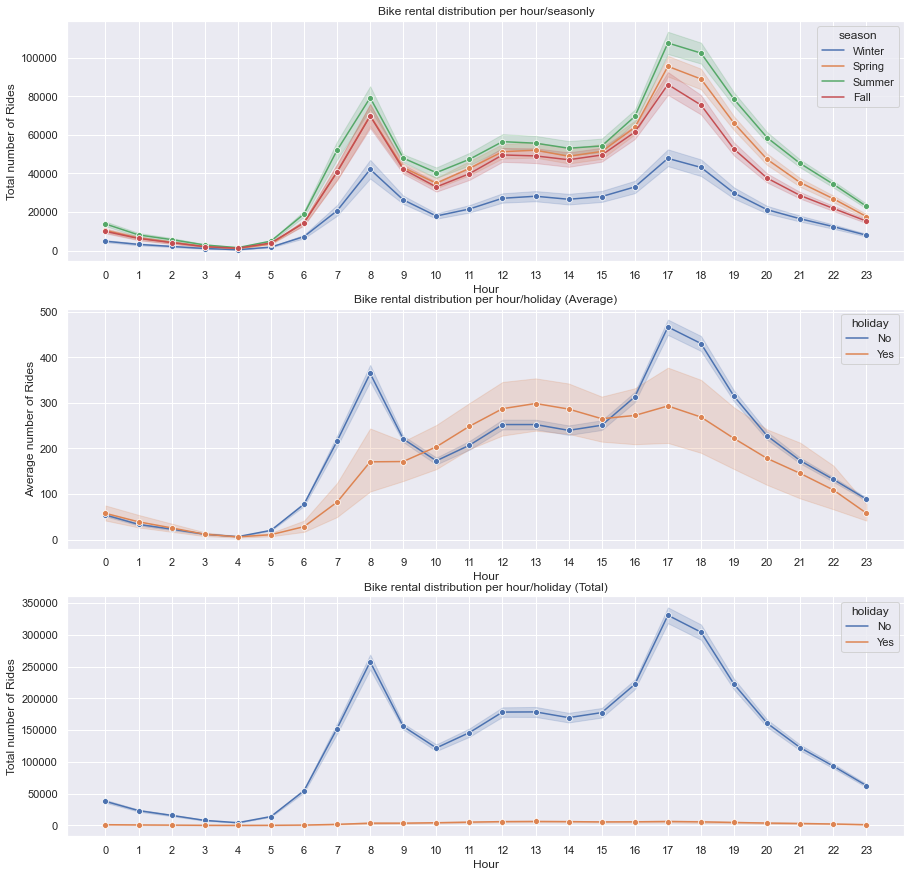

In [481]:
# Creating Plot with seaborn

fig, ax = plt.subplots(figsize=(15,15), nrows= 3, ncols=1)


sns.lineplot(x = df_h2011["dteday"].dt.hour, y = 'cnt', hue='season', data= df_h2011, estimator=sum, marker="o", ax=ax[0])
sns.lineplot(x = df_h2011["dteday"].dt.hour, y= 'cnt', hue='holiday', data= df_h2011,estimator=mean, marker="o", ax=ax[1])
sns.lineplot(x = df_h2011["dteday"].dt.hour, y= 'cnt', hue='holiday', data= df_h2011, estimator=sum, marker="o", ax=ax[2])


ax[0].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0])
ax[1].set_xticks(np.arange(min(df_h2011["dteday"].dt.hour), max(df_h2011["dteday"].dt.hour) + 1, 1.0))
ax[2].set_xticks(np.arange(min(df_h2011["dteday"].dt.hour), max(df_h2011["dteday"].dt.hour) + 1, 1.0))


ax[0].set_title ('Bike rental distribution per hour/seasonly')
ax[1].set_title ('Bike rental distribution per hour/holiday (Average)')
ax[2].set_title ('Bike rental distribution per hour/holiday (Total)')

ax[0].set_ylabel('Total number of Rides')
ax[1].set_ylabel('Average number of Rides')
ax[2].set_ylabel('Total number of Rides')

ax[0].set_xlabel('Hour')
ax[1].set_xlabel('Hour')
ax[2].set_xlabel('Hour')

plt.show()


In [482]:
#order = pd.Categorical(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])               
#.reindex(order)
total_day = df_h2011.groupby(["hr","weekday"]).sum()[["cnt","registered","casual"]]
total_day

cnt  registered  casual
hr       weekday                             
00:00:00 Monday      3571        2582     989
         Tuesday     2790        2207     583
         Wednesday   3594        2983     611
         Thursday    4045        3340     705
         Friday      5453        4491     962
...                   ...         ...     ...
23:00:00 Wednesday   8625        7370    1255
         Thursday   10062        8676    1386
         Friday     11982        9955    2027
         Saturday   12049        9368    2681
         Sunday      6499        4985    1514

[168 rows x 3 columns]

In [483]:
# Testing Weekday/Weekend

df_h2011["DayOfWeek"] = df_h2011["dteday"].dt.weekday
df_h2011["IsWeekend"] = df_h2011["DayOfWeek"] >= 5

weekday = df_h2011.loc[df_h2011["weekday"].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
weekend = df_h2011.loc[df_h2011["weekday"].isin(['Saturday', 'Sunday'])]

display(weekday)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,DayOfWeek,IsWeekend
47,48,2011-01-03 00:00:00,Winter,2011,January,00:00:00,No,Monday,Yes,Clear,2.34,-2.80,44.0,23.9994,0,5,5,0,False
48,49,2011-01-03 01:00:00,Winter,2011,January,01:00:00,No,Monday,Yes,Clear,1.40,-4.78,44.0,27.9993,0,2,2,0,False
49,50,2011-01-03 04:00:00,Winter,2011,January,04:00:00,No,Monday,Yes,Clear,-0.48,-6.76,47.0,26.0027,0,1,1,0,False
50,51,2011-01-03 05:00:00,Winter,2011,January,05:00:00,No,Monday,Yes,Clear,-0.48,-6.76,47.0,19.0012,0,3,3,0,False
51,52,2011-01-03 06:00:00,Winter,2011,January,06:00:00,No,Monday,Yes,Clear,-1.42,-8.74,50.0,26.0027,0,30,30,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31 19:00:00,Winter,2012,December,19:00:00,No,Monday,Yes,Misty,4.22,1.16,60.0,11.0014,11,108,119,0,False
17375,17376,2012-12-31 20:00:00,Winter,2012,December,20:00:00,No,Monday,Yes,Misty,4.22,1.16,60.0,11.0014,8,81,89,0,False
17376,17377,2012-12-31 21:00:00,Winter,2012,December,21:00:00,No,Monday,Yes,Clear,4.22,1.16,60.0,11.0014,7,83,90,0,False
17377,17378,2012-12-31 22:00:00,Winter,2012,December,22:00:00,No,Monday,Yes,Clear,4.22,1.82,56.0,8.9981,13,48,61,0,False


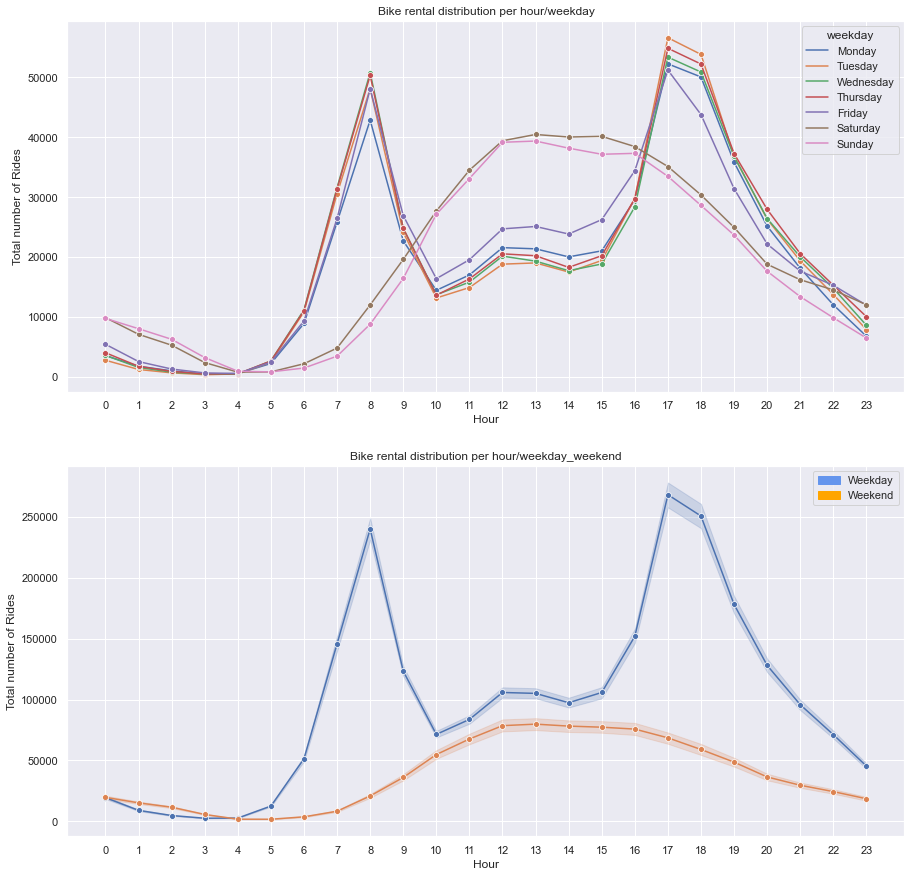

In [484]:
fig, ax = plt.subplots(figsize=(15,15), nrows= 2, ncols=1)

sns.lineplot(x = df_h2011["dteday"].dt.hour, y= 'cnt', hue="weekday", data= df_h2011, estimator=sum, marker="o", ax=ax[0], ci=None)
sns.lineplot(x = df_h2011["dteday"].dt.hour, y= 'cnt', hue="IsWeekend", data= df_h2011, estimator=sum, marker="o", ax=ax[1])

# Alternative
#sns.lineplot(x=df_h2011["dteday"].dt.hour, y='cnt', data=weekday, estimator=sum, marker="o",ax=ax[1])
#sns.lineplot(x=df_h2011["dteday"].dt.hour, y='cnt', data=weekend, estimator=sum, marker="o",ax=ax[1])

ax[0].set_xticks(np.arange(min(df_h2011["dteday"].dt.hour), max(df_h2011["dteday"].dt.hour) + 1, 1.0))
ax[1].set_xticks(np.arange(min(df_h2011["dteday"].dt.hour), max(df_h2011["dteday"].dt.hour) + 1, 1.0))

#ax[1].legend(title="Day of the week", labels=["Weekday", "Weekend"])
false = mpatches.Patch(color = "cornflowerblue" ,label='Weekday')
true = mpatches.Patch(color= "orange", label='Weekend')
ax[1].legend(handles=[false,true])

ax[0].set_title ('Bike rental distribution per hour/weekday')
ax[1].set_title ('Bike rental distribution per hour/weekday_weekend')

ax[0].set_ylabel('Total number of Rides')
ax[1].set_ylabel('Total number of Rides')

ax[0].set_xlabel('Hour')
ax[1].set_xlabel('Hour')

plt.show()

,registered,casual
weekday,,
Monday,384719,70784
Tuesday,411266,57843
Wednesday,415729,57319
Thursday,423935,61460
Friday,409552,78238
Saturday,323955,153852
Sunday,303506,140521


,registered,casual
season,,
Winter,410726,60622
Spring,715067,203522
Summer,835038,226091
Fall,711831,129782


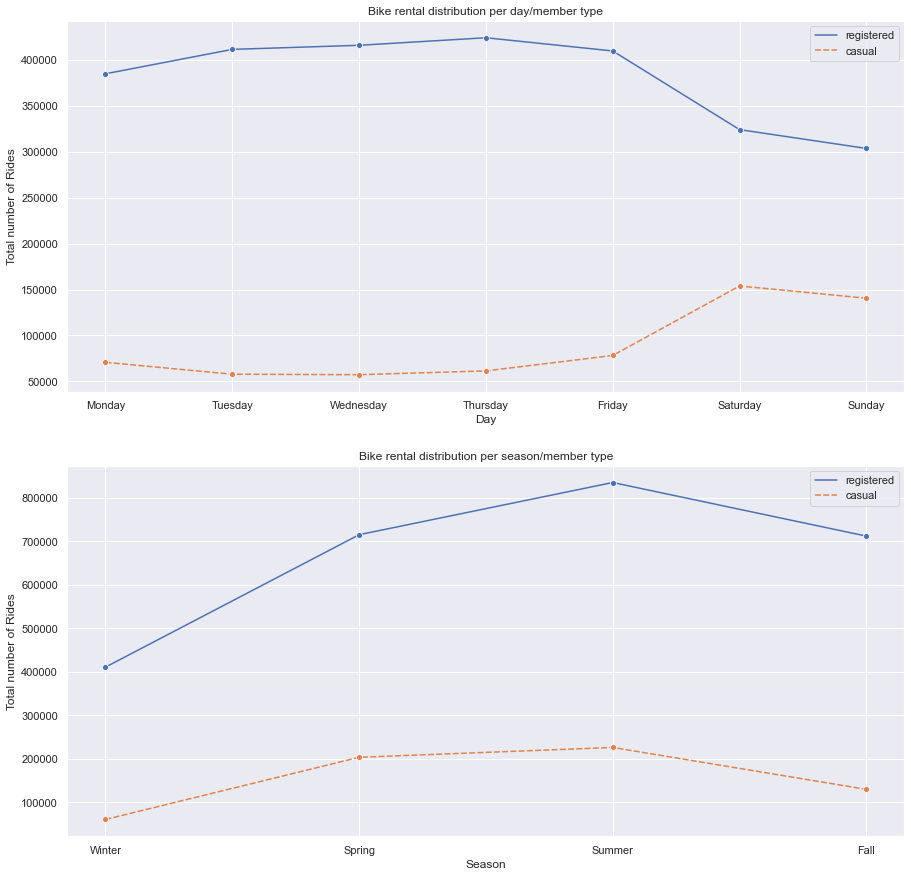

In [485]:
total_day = df_h2011.groupby(["weekday"]).sum()[["registered","casual"]]
total_hday = df_h2011.groupby(["season"]).sum()[["registered","casual"]]

display(total_day,total_hday)

fig, ax = plt.subplots(figsize=(15,15), nrows= 2, ncols=1)

sns.lineplot(data=total_day, marker="o", ax=ax[0])
sns.lineplot(data=total_hday, marker="o", ax=ax[1])

ax[0].set_title("Bike rental distribution per day/member type")
ax[0].set_xlabel("Day")
ax[0].set_ylabel("Total number of Rides")

ax[1].set_title("Bike rental distribution per season/member type")
ax[1].set_xlabel("Season")
ax[1].set_ylabel("Total number of Rides")

plt.show()

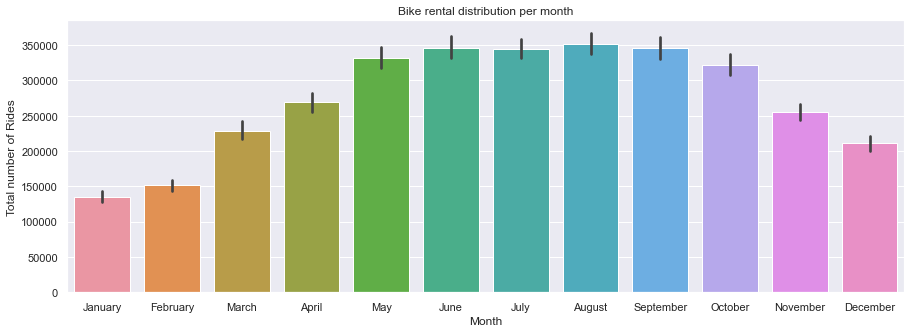

In [486]:
plt.figure(figsize=(15,5))
sns.barplot(x = "mnth", y = "cnt", data = df_h2011, estimator=sum)
plt.title("Bike rental distribution per month")
plt.xlabel("Month")
plt.ylabel("Total number of Rides")
plt.show()

In [487]:
temp = df_h2011.groupby(["hr","temp"]).sum()[["cnt","registered","casual"]]
temp.head(10)

cnt  registered  casual
hr       temp                          
00:00:00 -6.12   35          33       2
         -5.18    7           7       0
         -4.24    9           9       0
         -3.30   77          74       3
         -2.36   19          17       2
         -1.42   91          86       5
         -0.48  271         251      20
          0.46  117         107      10
          1.40  324         291      33
          2.34  415         373      42

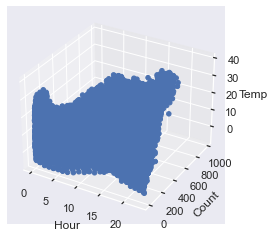

In [488]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df_h2011["dteday"].dt.hour
y = df_h2011["cnt"]
z = df_h2011["temp"]

ax.set_xlabel("Hour")
ax.set_ylabel("Count")
ax.set_zlabel("Temp")

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

ax.scatter(x, y, z, cmap=cmap, alpha=1)

plt.show()

In [489]:
df_d2011.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,No,Saturday,No,Clear,7.98,7.76,81.0,10.72,331,654,985
1,2,2011-01-02,Winter,2011,January,No,Sunday,No,Clear,8.92,7.10,70.0,16.75,131,670,801
2,3,2011-01-03,Winter,2011,January,No,Monday,Yes,Clear,1.40,-3.46,44.0,16.75,120,1229,1349
3,4,2011-01-04,Winter,2011,January,No,Tuesday,Yes,Clear,1.40,-2.14,59.0,10.72,108,1454,1562
4,5,2011-01-05,Winter,2011,January,No,Wednesday,Yes,Clear,2.81,-0.82,44.0,12.73,82,1518,1600


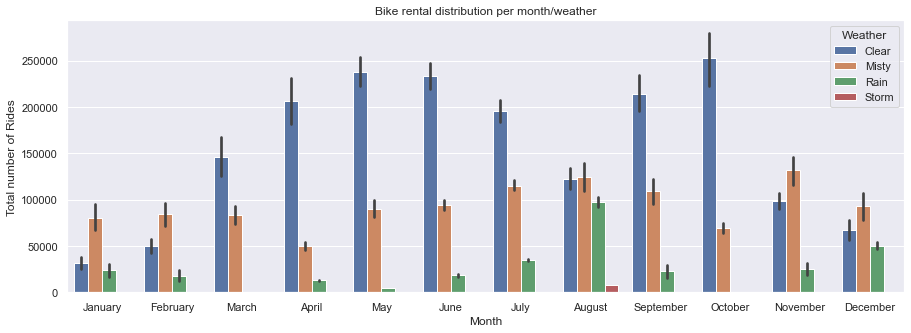

In [490]:
plt.figure(figsize=(15,5))
sns.barplot(x = "mnth", y = "cnt", data = df_d2011, hue="weathersit", estimator=sum) #black bar -konfidenzinterval
plt.title("Bike rental distribution per month/weather")
plt.xlabel("Month")
plt.ylabel("Total number of Rides")
plt.legend(title="Weather")
plt.show()

In [491]:
# setting the path for joining multiple files
files1 = os.path.join ("/Users/linhvu/Desktop/CA Projects/Capital Bike Share", "2017Q*.csv")

# list of merged files returned
files1 = glob.glob(files1)

# joining files with concat and read_csv
df_2017 = pd.concat(map(pd.read_csv, files1), ignore_index=True)
df_2017

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,221,2017-01-01 00:00:41,2017-01-01 00:04:23,31634,3rd & Tingey St SE,31208,M St & New Jersey Ave SE,W00869,Member
1,1676,2017-01-01 00:06:53,2017-01-01 00:34:49,31258,Lincoln Memorial,31270,8th & D St NW,W00894,Casual
2,1356,2017-01-01 00:07:10,2017-01-01 00:29:47,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W21945,Casual
3,1327,2017-01-01 00:07:22,2017-01-01 00:29:30,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W20012,Casual
4,1636,2017-01-01 00:07:36,2017-01-01 00:34:52,31258,Lincoln Memorial,31270,8th & D St NW,W22786,Casual
...,...,...,...,...,...,...,...,...,...
3757772,1135,2017-06-30 23:58:48,2017-07-01 00:17:43,31221,18th & M St NW,31645,6th & K St NE,W20131,Casual
3757773,2904,2017-06-30 23:58:54,2017-07-01 00:47:18,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,W22299,Casual
3757774,1126,2017-06-30 23:58:55,2017-07-01 00:17:42,31221,18th & M St NW,31645,6th & K St NE,W23406,Member
3757775,549,2017-06-30 23:59:01,2017-07-01 00:08:11,31518,New York Ave & Hecht Ave NE,31510,18th St & Rhode Island Ave NE,W21666,Member


In [492]:
#convert to datetime
df_2017["Start date"]= pd.to_datetime(df_2017["Start date"])
df_2017["End date"]= pd.to_datetime(df_2017["End date"])

# Looking for null cell
display (df_2017.info(), df_2017.isna().sum(),df_2017.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757777 entries, 0 to 3757776
Data columns (total 9 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Duration              int64         
 1   Start date            datetime64[ns]
 2   End date              datetime64[ns]
 3   Start station number  int64         
 4   Start station         object        
 5   End station number    int64         
 6   End station           object        
 7   Bike number           object        
 8   Member type           object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 258.0+ MB


None

Duration                0
Start date              0
End date                0
Start station number    0
Start station           0
End station number      0
End station             0
Bike number             0
Member type             0
dtype: int64

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,221,2017-01-01 00:00:41,2017-01-01 00:04:23,31634,3rd & Tingey St SE,31208,M St & New Jersey Ave SE,W00869,Member
1,1676,2017-01-01 00:06:53,2017-01-01 00:34:49,31258,Lincoln Memorial,31270,8th & D St NW,W00894,Casual
2,1356,2017-01-01 00:07:10,2017-01-01 00:29:47,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W21945,Casual
3,1327,2017-01-01 00:07:22,2017-01-01 00:29:30,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W20012,Casual
4,1636,2017-01-01 00:07:36,2017-01-01 00:34:52,31258,Lincoln Memorial,31270,8th & D St NW,W22786,Casual


In [493]:
# setting the path for joining multiple files
files2 = os.path.join ("/Users/linhvu/Desktop/CA Projects/Capital Bike Share", "2016Q*.csv")

# list of merged files returned
files2 = glob.glob(files2)

# joining files with concat and read_csv
df_2016 = pd.concat(map(pd.read_csv, files2), ignore_index=True)
df_2016

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,149,2016-04-01 00:00:30,2016-04-01 00:03:00,31267,17th St & Massachusetts Ave NW,31214,17th & Corcoran St NW,W00443,Member
1,847,2016-04-01 00:00:46,2016-04-01 00:14:54,31247,Jefferson Dr & 14th St SW,31623,Columbus Circle / Union Station,W21938,Member
2,844,2016-04-01 00:00:56,2016-04-01 00:15:00,31247,Jefferson Dr & 14th St SW,31623,Columbus Circle / Union Station,W20351,Casual
3,110,2016-04-01 00:01:55,2016-04-01 00:03:45,31214,17th & Corcoran St NW,31278,18th & R St NW,W01385,Member
4,240,2016-04-01 00:02:00,2016-04-01 00:06:01,31121,Calvert St & Woodley Pl NW,31104,Adams Mill & Columbia Rd NW,W20787,Member
...,...,...,...,...,...,...,...,...,...
3333989,967,2016-03-31 23:57:42,2016-04-01 00:13:49,31266,11th & M St NW,31600,5th & K St NW,W20562,Casual
3333990,534,2016-03-31 23:57:51,2016-04-01 00:06:46,31222,New York Ave & 15th St NW,31278,18th & R St NW,W20222,Member
3333991,301,2016-03-31 23:59:18,2016-04-01 00:04:20,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Member
3333992,557,2016-03-31 23:59:38,2016-04-01 00:08:56,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Member


In [494]:
df_2016["Start date"]= pd.to_datetime(df_2016["Start date"])
df_2016["End date"]= pd.to_datetime(df_2016["End date"])

display (df_2016.info(), df_2016.isna().sum(),df_2016.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333994 entries, 0 to 3333993
Data columns (total 9 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Duration              int64         
 1   Start date            datetime64[ns]
 2   End date              datetime64[ns]
 3   Start station number  int64         
 4   Start station         object        
 5   End station number    int64         
 6   End station           object        
 7   Bike number           object        
 8   Member type           object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 228.9+ MB


None

Duration                0
Start date              0
End date                0
Start station number    0
Start station           0
End station number      0
End station             0
Bike number             0
Member type             0
dtype: int64

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,149,2016-04-01 00:00:30,2016-04-01 00:03:00,31267,17th St & Massachusetts Ave NW,31214,17th & Corcoran St NW,W00443,Member
1,847,2016-04-01 00:00:46,2016-04-01 00:14:54,31247,Jefferson Dr & 14th St SW,31623,Columbus Circle / Union Station,W21938,Member
2,844,2016-04-01 00:00:56,2016-04-01 00:15:00,31247,Jefferson Dr & 14th St SW,31623,Columbus Circle / Union Station,W20351,Casual
3,110,2016-04-01 00:01:55,2016-04-01 00:03:45,31214,17th & Corcoran St NW,31278,18th & R St NW,W01385,Member
4,240,2016-04-01 00:02:00,2016-04-01 00:06:01,31121,Calvert St & Woodley Pl NW,31104,Adams Mill & Columbia Rd NW,W20787,Member


In [495]:
# setting the path for joining multiple files
files3 = os.path.join ("/Users/linhvu/Desktop/CA Projects/Capital Bike Share", "2015Q*.csv")

# list of merged files returned
files3 = glob.glob(files3)

# joining files with concat and read_csv
df_2015 = pd.concat(map(pd.read_csv, files3), ignore_index=True)
df_2015

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,166,2015-10-01 00:01:30,2015-10-01 00:04:16,31602,Park Rd & Holmead Pl NW,31105,14th & Harvard St NW,W21109,Member
1,379,2015-10-01 00:01:38,2015-10-01 00:07:58,31314,34th & Water St NW,31237,25th St & Pennsylvania Ave NW,W20603,Member
2,696,2015-10-01 00:01:52,2015-10-01 00:13:28,31214,17th & Corcoran St NW,31214,17th & Corcoran St NW,W01233,Member
3,219,2015-10-01 00:02:46,2015-10-01 00:06:26,31104,Adams Mill & Columbia Rd NW,31121,Calvert St & Woodley Pl NW,W00218,Member
4,253,2015-10-01 00:03:02,2015-10-01 00:07:16,31102,11th & Kenyon St NW,31102,11th & Kenyon St NW,W21612,Member
...,...,...,...,...,...,...,...,...,...
3185901,416,2015-03-31 23:52:52,2015-03-31 23:59:48,31239,Rhode Island & Connecticut Ave NW,31268,12th & U St NW,W01162,Member
3185902,410,2015-03-31 23:54:29,2015-04-01 00:01:20,31623,Columbus Circle / Union Station,31632,15th & F St NE,W21214,Member
3185903,857,2015-03-31 23:55:03,2015-04-01 00:09:21,31623,Columbus Circle / Union Station,31506,1st & Rhode Island Ave NW,W00995,Member
3185904,122,2015-03-31 23:56:02,2015-03-31 23:58:04,32013,Montgomery & East Ln,32002,Bethesda Ave & Arlington Rd,W21816,Member


In [496]:
df_2015["Start date"]= pd.to_datetime(df_2015["Start date"])
df_2015["End date"]= pd.to_datetime(df_2015["End date"])
display (df_2015.info(), df_2015.isna().sum(),df_2015.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3185906 entries, 0 to 3185905
Data columns (total 9 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Duration              int64         
 1   Start date            datetime64[ns]
 2   End date              datetime64[ns]
 3   Start station number  int64         
 4   Start station         object        
 5   End station number    int64         
 6   End station           object        
 7   Bike number           object        
 8   Member type           object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 218.8+ MB


None

Duration                0
Start date              0
End date                0
Start station number    0
Start station           0
End station number      0
End station             0
Bike number             0
Member type             0
dtype: int64

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,166,2015-10-01 00:01:30,2015-10-01 00:04:16,31602,Park Rd & Holmead Pl NW,31105,14th & Harvard St NW,W21109,Member
1,379,2015-10-01 00:01:38,2015-10-01 00:07:58,31314,34th & Water St NW,31237,25th St & Pennsylvania Ave NW,W20603,Member
2,696,2015-10-01 00:01:52,2015-10-01 00:13:28,31214,17th & Corcoran St NW,31214,17th & Corcoran St NW,W01233,Member
3,219,2015-10-01 00:02:46,2015-10-01 00:06:26,31104,Adams Mill & Columbia Rd NW,31121,Calvert St & Woodley Pl NW,W00218,Member
4,253,2015-10-01 00:03:02,2015-10-01 00:07:16,31102,11th & Kenyon St NW,31102,11th & Kenyon St NW,W21612,Member


In [497]:
start_st = df_2015.groupby(["Start date","Start station"]).count().sort_values(by=["Start date"], ascending=True)
start_st = start_st[["Duration"]].rename(columns={"Duration":"Count"}).reset_index().head(20)
#start_st = start_st.groupby(start_st["Start date"].dt.month).sum()
start_st = start_st.drop_duplicates(subset="Start station",keep="first")

start_st

,Start date,Start station,Count
0,2015-01-01 00:02:44,Constitution Ave & 2nd St NW/DOL,1
2,2015-01-01 00:04:32,20th & E St NW,1
3,2015-01-01 00:07:18,Park Rd & Holmead Pl NW,1
4,2015-01-01 00:09:39,Jefferson Dr & 14th St SW,1
6,2015-01-01 00:12:26,New York Ave & 15th St NW,1
7,2015-01-01 00:13:01,Wilson Blvd & N Uhle St,1
8,2015-01-01 00:16:52,17th & Corcoran St NW,1
9,2015-01-01 00:17:03,Jefferson Memorial,1
10,2015-01-01 00:18:20,Adams Mill & Columbia Rd NW,1
11,2015-01-01 00:19:42,Market Square / King St & Royal St,1


In [552]:
data2015 = df_2015.copy()
data2016 = df_2016.copy()
data2017 = df_2017.copy()

#Change second to minute
data2015["Duration"] = pd.to_datetime(data2015["Duration"], unit="s").dt.time
data2016["Duration"] = pd.to_datetime(data2016["Duration"], unit="s").dt.time
data2017["Duration"] = pd.to_datetime(data2017["Duration"], unit="s").dt.time


#Add new column to Dataframe
data2015 = data2015.assign(Month=data2015["Start date"].dt.month, Weekday=data2015["Start date"].dt.day_name(),Season=data2015["Start date"].dt.month%12 // 3 + 1, Count=1)
data2016 = data2016.assign(Month=data2016["Start date"].dt.month, Weekday=data2016["Start date"].dt.day_name(),Season=data2016["Start date"].dt.month%12 // 3 + 1, Count=1)
data2017 = data2017.assign(Month=data2017["Start date"].dt.month, Weekday=data2017["Start date"].dt.day_name(),Season=data2017["Start date"].dt.month%12 // 3 + 1, Count=1)


data2015.loc[data2015['Month'] == 1, 'Month'] = 'January'
data2015.loc[data2015['Month'] == 2, 'Month'] = 'February'
data2015.loc[data2015['Month'] == 3, 'Month'] = 'March'
data2015.loc[data2015['Month'] == 4, 'Month'] = 'April'
data2015.loc[data2015['Month'] == 5, 'Month'] = 'May'
data2015.loc[data2015['Month'] == 6, 'Month'] = 'June'
data2015.loc[data2015['Month'] == 7, 'Month'] = 'July'
data2015.loc[data2015['Month'] == 8, 'Month'] = 'August'
data2015.loc[data2015['Month'] == 9, 'Month'] = 'September'
data2015.loc[data2015['Month'] == 10, 'Month'] = 'October'
data2015.loc[data2015['Month'] == 11, 'Month'] = 'November'
data2015.loc[data2015['Month'] == 12, 'Month'] = 'December'

data2015.loc[data2015['Season'] == 1, 'Season'] = 'Winter'
data2015.loc[data2015['Season'] == 2, 'Season'] = 'Spring'
data2015.loc[data2015['Season'] == 3, 'Season'] = 'Summer'
data2015.loc[data2015['Season'] == 4, 'Season'] = 'Fall'

data2016.loc[data2016['Month'] == 1, 'Month'] = 'January'
data2016.loc[data2016['Month'] == 2, 'Month'] = 'February'
data2016.loc[data2016['Month'] == 3, 'Month'] = 'March'
data2016.loc[data2016['Month'] == 4, 'Month'] = 'April'
data2016.loc[data2016['Month'] == 5, 'Month'] = 'May'
data2016.loc[data2016['Month'] == 6, 'Month'] = 'June'
data2016.loc[data2016['Month'] == 7, 'Month'] = 'July'
data2016.loc[data2016['Month'] == 8, 'Month'] = 'August'
data2016.loc[data2016['Month'] == 9, 'Month'] = 'September'
data2016.loc[data2016['Month'] == 10, 'Month'] = 'October'
data2016.loc[data2016['Month'] == 11, 'Month'] = 'November'
data2016.loc[data2016['Month'] == 12, 'Month'] = 'December'

data2016.loc[data2016['Season'] == 1, 'Season'] = 'Winter'
data2016.loc[data2016['Season'] == 2, 'Season'] = 'Spring'
data2016.loc[data2016['Season'] == 3, 'Season'] = 'Summer'
data2016.loc[data2016['Season'] == 4, 'Season'] = 'Fall'

data2017.loc[data2017['Month'] == 1, 'Month'] = 'January'
data2017.loc[data2017['Month'] == 2, 'Month'] = 'February'
data2017.loc[data2017['Month'] == 3, 'Month'] = 'March'
data2017.loc[data2017['Month'] == 4, 'Month'] = 'April'
data2017.loc[data2017['Month'] == 5, 'Month'] = 'May'
data2017.loc[data2017['Month'] == 6, 'Month'] = 'June'
data2017.loc[data2017['Month'] == 7, 'Month'] = 'July'
data2017.loc[data2017['Month'] == 8, 'Month'] = 'August'
data2017.loc[data2017['Month'] == 9, 'Month'] = 'September'
data2017.loc[data2017['Month'] == 10, 'Month'] = 'October'
data2017.loc[data2017['Month'] == 11, 'Month'] = 'November'
data2017.loc[data2017['Month'] == 12, 'Month'] = 'December'

data2017.loc[data2017['Season'] == 1, 'Season'] = 'Winter'
data2017.loc[data2017['Season'] == 2, 'Season'] = 'Spring'
data2017.loc[data2017['Season'] == 3, 'Season'] = 'Summer'
data2017.loc[data2017['Season'] == 4, 'Season'] = 'Fall'

data2015 = data2015.sort_values(by=["Start date"], ascending=True).reset_index(drop=True)
data2016 = data2016.sort_values(by=["Start date"], ascending=True).reset_index(drop=True)
data2017 = data2017.sort_values(by=["Start date"], ascending=True).reset_index(drop=True)


display(data2015.head(),data2016.head(),data2017.head())

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Month,Weekday,Season,Count
0,00:39:49,2015-01-01 00:02:44,2015-01-01 00:42:33,31271,Constitution Ave & 2nd St NW/DOL,31254,15th & K St NW,W01140,Casual,January,Thursday,Winter,1
1,00:39:54,2015-01-01 00:02:46,2015-01-01 00:42:41,31271,Constitution Ave & 2nd St NW/DOL,31254,15th & K St NW,W00612,Casual,January,Thursday,Winter,1
2,00:07:48,2015-01-01 00:04:32,2015-01-01 00:12:20,31204,20th & E St NW,31234,20th & O St NW / Dupont South,W01226,Member,January,Thursday,Winter,1
3,00:05:48,2015-01-01 00:07:18,2015-01-01 00:13:06,31602,Park Rd & Holmead Pl NW,31117,15th & Euclid St NW,W20216,Member,January,Thursday,Winter,1
4,00:16:20,2015-01-01 00:09:39,2015-01-01 00:26:00,31247,Jefferson Dr & 14th St SW,31241,Thomas Circle,W21005,Casual,January,Thursday,Winter,1


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Month,Weekday,Season,Count
0,00:02:46,2016-01-01 00:06:58,2016-01-01 00:09:44,31102,11th & Kenyon St NW,31105,14th & Harvard St NW,W01346,Member,January,Friday,Winter,1
1,00:07:28,2016-01-01 00:10:20,2016-01-01 00:17:48,32039,Old Georgetown Rd & Southwick St,32002,Bethesda Ave & Arlington Rd,W22202,Member,January,Friday,Winter,1
2,00:11:55,2016-01-01 00:13:52,2016-01-01 00:25:48,31222,New York Ave & 15th St NW,31214,17th & Corcoran St NW,W21427,Member,January,Friday,Winter,1
3,00:03:33,2016-01-01 00:15:29,2016-01-01 00:19:03,31506,1st & Rhode Island Ave NW,31509,New Jersey Ave & R St NW,W01294,Member,January,Friday,Winter,1
4,00:14:32,2016-01-01 00:16:16,2016-01-01 00:30:49,31041,Prince St & Union St,31048,King St Metro South,W22058,Member,January,Friday,Winter,1


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Month,Weekday,Season,Count
0,00:03:41,2017-01-01 00:00:41,2017-01-01 00:04:23,31634,3rd & Tingey St SE,31208,M St & New Jersey Ave SE,W00869,Member,January,Sunday,Winter,1
1,00:27:56,2017-01-01 00:06:53,2017-01-01 00:34:49,31258,Lincoln Memorial,31270,8th & D St NW,W00894,Casual,January,Sunday,Winter,1
2,00:22:36,2017-01-01 00:07:10,2017-01-01 00:29:47,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W21945,Casual,January,Sunday,Winter,1
3,00:22:07,2017-01-01 00:07:22,2017-01-01 00:29:30,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W20012,Casual,January,Sunday,Winter,1
4,00:27:16,2017-01-01 00:07:36,2017-01-01 00:34:52,31258,Lincoln Memorial,31270,8th & D St NW,W22786,Casual,January,Sunday,Winter,1


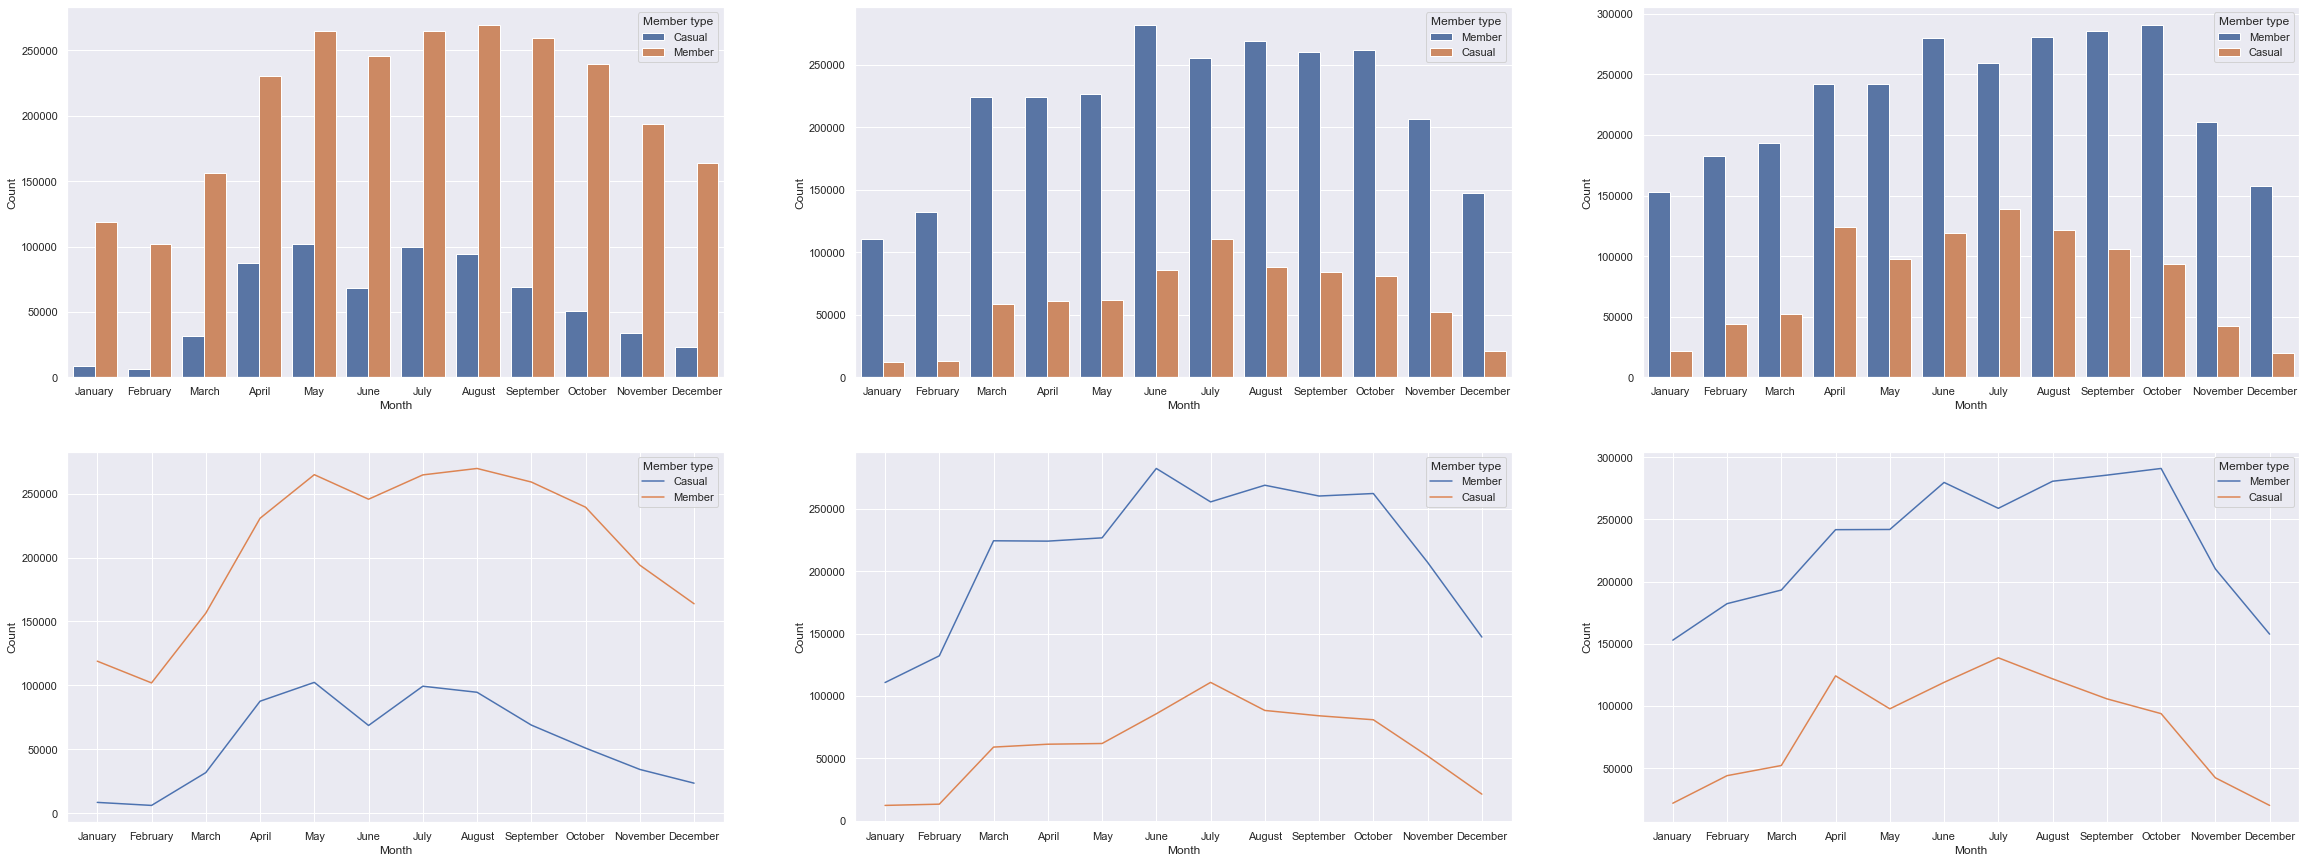

In [502]:

fig, ax = plt.subplots(figsize=(40,15), nrows= 2, ncols=3)

b1 = sns.barplot(x = "Month", y= 'Count', hue="Member type", data= data2015, estimator=sum, ax=ax[0,0], ci=None)
s1 = sns.lineplot(x = "Month", y= 'Count', hue="Member type", data= data2015, estimator=sum, ax=ax[1,0], ci=None)

b2 = sns.barplot(x = "Month", y= 'Count', hue="Member type", data= data2016, estimator=sum, ax=ax[0,1], ci=None)
s2 = sns.lineplot(x = "Month", y= 'Count', hue="Member type", data= data2016, estimator=sum, ax=ax[1,1], ci=None)

b3 = sns.barplot(x = "Month", y= 'Count', hue="Member type", data= data2017, estimator=sum, ax=ax[0,2], ci=None)
s3 = sns.lineplot(x = "Month", y= 'Count', hue="Member type", data= data2017, estimator=sum, ax=ax[1,2], ci=None)

#s2 = sns.barplot(x = "Month", y= 'Count', hue="Member type", data= data2016, estimator=sum, ci=None)
#s3 = sns.barplot(x = "Month", y= 'Count', hue="Member type", data= data2017, estimator=sum, ci=None)

#for container in s1.containers:
#    s1.bar_label(container, fmt='%.0f%%')

plt.show()

,Month,Number of Rides 2015,Number of Rides 2016,Number of Rides 2017
0,January,127411,123252,174804
1,February,108052,145654,226303
2,March,188256,283493,245403
3,April,318340,285516,365990
4,May,367185,288720,339677
5,June,314293,368097,398751
6,July,364015,366458,397680
7,August,364313,357328,402534
8,September,328038,344408,391371
9,October,290351,343243,384833


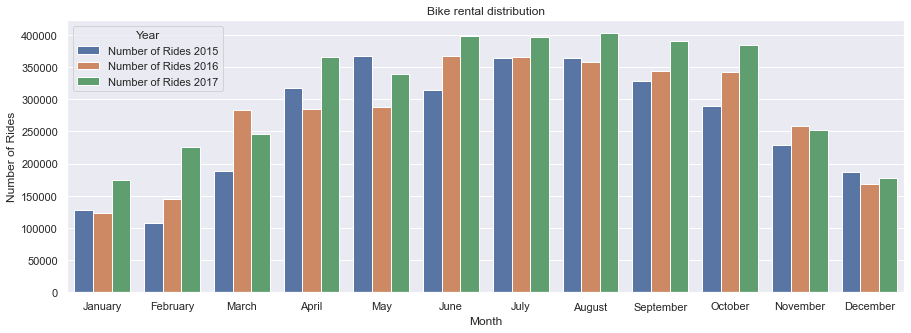

In [619]:
data2015['Month'] = pd.Categorical(data2015['Month'], categories=["January","February","March","April","May","June","July","August","September","October","November","December"])
data2016['Month'] = pd.Categorical(data2016['Month'], categories=["January","February","March","April","May","June","July","August","September","October","November","December"])
data2017['Month'] = pd.Categorical(data2017['Month'], categories=["January","February","March","April","May","June","July","August","September","October","November","December"])

total_count15 = data2015.groupby(["Month"]).sum()[["Count"]]
total_count16 = data2016.groupby(["Month"]).sum()[["Count"]]
total_count17 = data2017.groupby(["Month"]).sum()[["Count"]]

total_count15 = total_count15[["Count"]].rename(columns={"Count":"Number of Rides"}).reset_index(level=0)
total_count16 = total_count16[["Count"]].rename(columns={"Count":"Number of Rides"}).reset_index(level=0)
total_count17 = total_count17[["Count"]].rename(columns={"Count":"Number of Rides"}).reset_index(level=0)

total = pd.merge(total_count15,total_count16, on="Month")
total = pd.merge(total,total_count17, on="Month")

total = total.rename(columns={"Number of Rides_x":"Number of Rides 2015","Number of Rides_y":"Number of Rides 2016","Number of Rides":"Number of Rides 2017"})


display(total)
#display(total_count15,total_count16,total_count17)

total1 = pd.melt(total, id_vars=["Month"], value_vars=["Number of Rides 2015","Number of Rides 2016","Number of Rides 2017"])

plt.figure(figsize=(15,5))

sns.barplot(x = "Month", y= 'value', hue="variable", data= total1, ci=None)
plt.legend(title="Year")
plt.ylabel("Number of Rides")
plt.title("Bike rental distribution")

plt.show()

'The Compound Annual Growth Rates for number of rides in 2016 is: 4.65% '

'The Compound Annual Growth Rates for number of rides in 2017 is: 12.71% '

,Month,Number of Rides 2015,Number of Rides 2016,Number of Rides 2017,Percentage 2015,Percentage 2016,Percentage 2017,Growth Rate 2016,Growth Rate 2017
0,January,127411,123252,174804,4.00,3.70,4.65,-3.26,41.83
1,February,108052,145654,226303,3.39,4.37,6.02,34.80,55.37
2,March,188256,283493,245403,5.91,8.50,6.53,50.59,-13.44
3,April,318340,285516,365990,9.99,8.56,9.74,-10.31,28.19
4,May,367185,288720,339677,11.53,8.66,9.04,-21.37,17.65
5,June,314293,368097,398751,9.87,11.04,10.61,17.12,8.33
6,July,364015,366458,397680,11.43,10.99,10.58,0.67,8.52
7,August,364313,357328,402534,11.44,10.72,10.71,-1.92,12.65
8,September,328038,344408,391371,10.30,10.33,10.41,4.99,13.64
9,October,290351,343243,384833,9.11,10.30,10.24,18.22,12.12


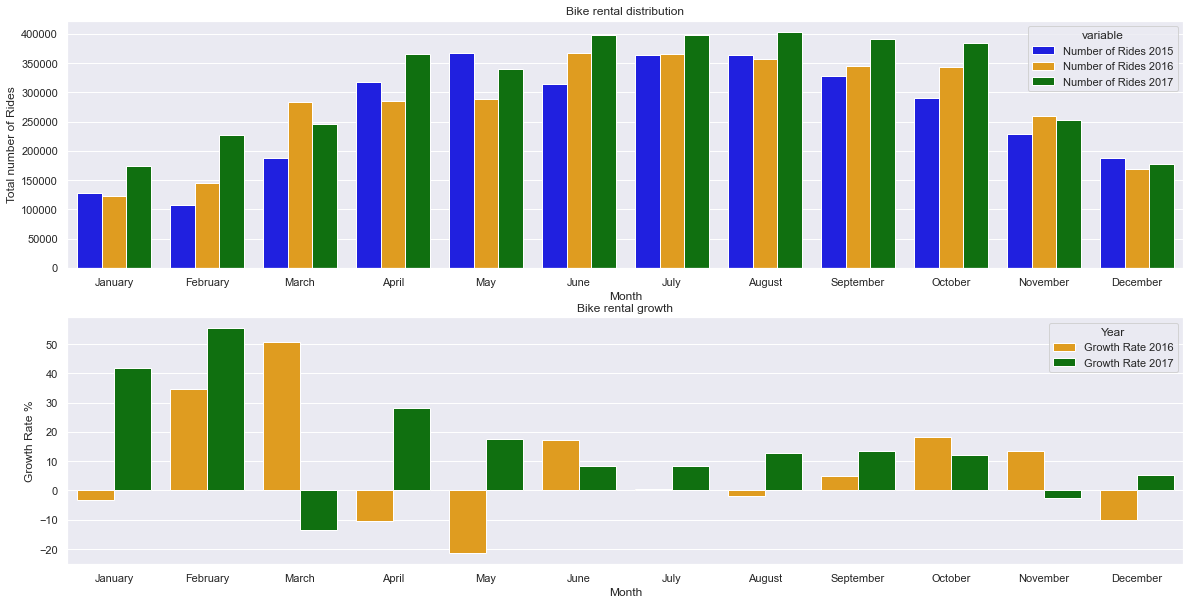

In [662]:
percentage15 = []
for i in range(total.shape[0]):
    pct = (total["Number of Rides 2015"][i] / total["Number of Rides 2015"].sum()) * 100
    percentage15.append(round(pct,2))
total['Percentage 2015'] = percentage15

percentage16 = []
for i in range(total.shape[0]):
    pct = (total["Number of Rides 2016"][i] / total["Number of Rides 2016"].sum()) * 100
    percentage16.append(round(pct,2))
total['Percentage 2016'] = percentage16

percentage17 = []
for i in range(total.shape[0]):
    pct = (total["Number of Rides 2017"][i] / total["Number of Rides 2017"].sum()) * 100
    percentage17.append(round(pct,2))
total['Percentage 2017'] = percentage17

percentage_growth16 = []
for i in range(total.shape[0]):
    pct = ((total["Number of Rides 2016"][i] / total["Number of Rides 2015"][i]) - 1)*100
    percentage_growth16.append(round(pct,2))
total['Growth Rate 2016'] = percentage_growth16

percentage_growth17 = []
for i in range(total.shape[0]):
    pct = ((total["Number of Rides 2017"][i] / total["Number of Rides 2016"][i]) - 1)*100
    percentage_growth17.append(round(pct,2))
total['Growth Rate 2017'] = percentage_growth17

CAGR16 = (total["Number of Rides 2016"].sum()/total["Number of Rides 2015"].sum())**(1/1.0)-1
CAGR17 = (total["Number of Rides 2017"].sum()/total["Number of Rides 2016"].sum())**(1/1.0)-1

display ('The Compound Annual Growth Rates for number of rides in 2016 is: {:.2%} '.format(CAGR16))
display ('The Compound Annual Growth Rates for number of rides in 2017 is: {:.2%} '.format(CAGR17))

display(total)

total2 = pd.melt(total, id_vars=["Month"], value_vars=["Growth Rate 2016","Growth Rate 2017"])

color = ["blue","orange","green"]
color2 = ["orange","green"]

fig, ax = plt.subplots(figsize=(20,10), nrows= 2, ncols=1)

graph = sns.barplot(x = "Month", y= 'value', hue="variable", data= total1, ci=None, palette=color, ax=ax[0])
graph2 = sns.barplot(x = "Month", y= 'value', hue="variable", data= total2, ci=None, palette=color2, ax=ax[1])

plt.legend(title="Year")
ax[0].set_title("Bike rental distribution")
ax[0].set_xlabel("Month")
ax[0].set_ylabel("Total number of Rides")

ax[1].set_title("Bike rental growth")
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Growth Rate %")

plt.show()


In [661]:
bike15 = data2015.groupby(["Bike number"]).count()[["Count"]].sort_values(by="Count",ascending=False).reset_index(level=0)
bike16 = data2016.groupby(["Bike number"]).count()[["Count"]].sort_values(by="Count",ascending=False).reset_index(level=0)
bike17 = data2017.groupby(["Bike number"]).count()[["Count"]].sort_values(by="Count",ascending=False).reset_index(level=0)

total_bike = pd.DataFrame({"Year" : [2015,2016,2017],"Total number of bikes" : [3582,4450,4652]})

display(bike15,bike16,bike17,total_bike)

,Bike number,Count
0,W21852,1612
1,W21953,1603
2,W21705,1565
3,W21735,1551
4,W01301,1543
...,...,...
3577,W01108,4
3578,W00863,4
3579,W00768,3
3580,W00585,1


,Bike number,Count
0,W21828,1478
1,W00346,1437
2,W22092,1415
3,W22062,1403
4,W21640,1396
...,...,...
4445,W23233,1
4446,W23262,1
4447,W23058,1
4448,W23085,1


,Bike number,Count
0,W23386,1696
1,W22897,1643
2,W23349,1640
3,W22982,1628
4,W22530,1601
...,...,...
4647,W00229,5
4648,W20707,3
4649,W20683,2
4650,W20245,2


,Year,Total number of bikes
0,2015,3582
1,2016,4450
2,2017,4652
